# 颜色矩阵

在编程中有时候需要对图片做特殊的处理，比如将图片做出黑白的，或者老照片的效果，有时候还要对图片进行变换，以拉伸，扭曲等等。

这些效果在android中有很好的支持，通过颜色矩阵（ColorMatrix）和坐标变换矩阵（Matrix）可以完美的做出上面的所说的效果。
下面将分别介绍这两个矩阵的用法和相关的函数。

颜色矩阵
android中可以通过颜色矩阵（ColorMatrix类）方面的操作颜色，颜色矩阵是一个5x4 的矩阵（如图1.1）
可以用来方面的修改图片中RGBA各分量的值，颜色矩阵以一维数组的方式存储如下：
[ a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t ]
他通过RGBA四个通道来直接操作对应颜色，如果会使用Photoshop就会知道有时处理图片通过控制RGBA各颜色通道来做出特殊的效果。
这个矩阵对颜色的作用计算方式如1.3示：

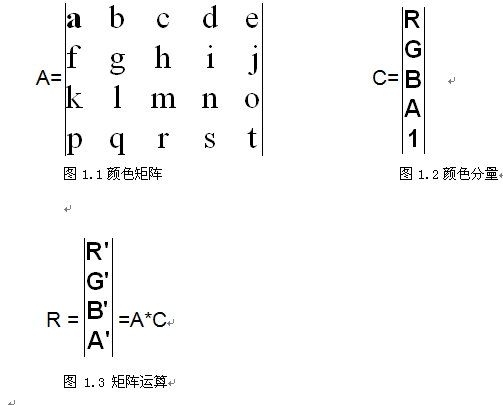

矩阵的运算规则是矩阵A的一行乘以矩阵C的一列作为矩阵R的一行，
C矩阵是图片中包含的ARGB信息，R矩阵是用颜色矩阵应用于C之后的新的颜色分量，运算结果如下：

R' = a*R + b*G + c*B + d*A + e;

G' = f*R + g*G + h*B + i*A + j;

B' = k*R + l*G + m*B + n*A + o;

A' = p*R + q*G + r*B + s*A + t;

颜色矩阵并不是看上去那么深奥，其实需要使用的参数很少，而且很有规律第一行决定红色第二行决定绿色
第三行决定蓝色，第四行决定了透明度，第五列是颜色的偏移量。下面是一个实际中使用的颜色矩阵。

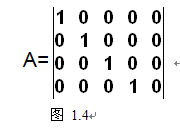

如果把这个矩阵作用于各颜色分量的话，R=A*C，计算后会发现，各个颜色分量实际上没有任何的改变(R'=R G'=G B'=B A'=A)。
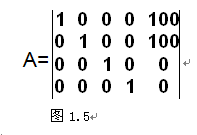

图1.5所示矩阵计算后会发现红色分量增加100，绿色分量增加100，
这样的效果就是图片偏黄，因为红色和绿色混合后得到黄色，黄色增加了100，图片当然就偏黄了。
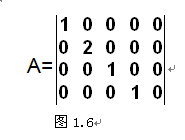
改变各颜色分量不仅可以通过修改第5列的颜色偏移量也可如上面矩阵所示将对应的颜色值乘以一个倍数，直接放大。
上图1.6是将绿色分量乘以2变为原来的2倍。相信读者至此已经明白了如何通过颜色矩阵来改变各颜色分量。

In [1]:
import numpy as np
import scipy as sci
import imageio
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

In [2]:
src = imageio.imread('../datas/city.jpg')
rgba = cv2.cvtColor(src,cv2.COLOR_RGB2RGBA).astype(np.float32)

In [16]:
c_matrix = np.array([
    [1,0,0,0,50],
    [0,1,0,0,50],
    [0,0,1.5,0,0],
    [0,0,0,1,0],
    [0,0,0,0,1]
],dtype=np.float32)

In [17]:
rows,cols = src.shape[0],src.shape[1]
dst = np.zeros_like(src).astype(np.float32)

In [18]:
for i in range(rows):
    for j in range(cols):
        color = np.array([rgba[i,j,0],rgba[i,j,1],rgba[i,j,2],rgba[i,j,3],1]).reshape((5,1))
        new_color = np.dot(c_matrix,color)
        dst[i,j] = (new_color[0],new_color[1],new_color[2])

Text(0.5,1,'Color Matrix')

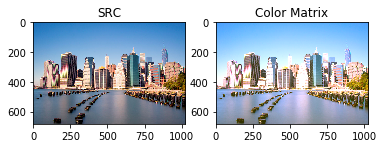

In [19]:
dst = np.clip(dst,0,255)
dst = np.uint8(dst)
plt.subplot(121)
plt.imshow(src)
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst)
plt.title('Color Matrix')

In [26]:
def color_matrix_filter(img,color_matrix):
    src = np.float32(img)
    if len(img.shape) < 2:
        src = np.float32(cv2.cvtColor(img,cv2.COLOR_GRAY2RGBA))
    else:
        src = np.float32(cv2.cvtColor(img,cv2.COLOR_RGB2RGBA))
    rows,cols = src.shape[0],src.shape[1]
    dst = np.zeros((rows,cols,3),dtype=src.dtype)
    for i in range(rows):
        for j in range(cols):
            color = np.array([rgba[i,j,0],rgba[i,j,1],rgba[i,j,2],rgba[i,j,3],1]).reshape((5,1))
            new_color = np.dot(color_matrix,color)
            dst[i,j] = (new_color[0],new_color[1],new_color[2])
    dst = np.clip(dst,0,255)
    dst = np.uint8(dst)
    return dst

## 1、调整亮度：

亮度(N取值为-255到255)  
1,0,0,0,N

0,1,0,0,N

0,0,1,0,N

0,0,0,1,0

In [27]:
c_matrix = np.array([
    [1,0,0,0,50],
    [0,1,0,0,50],
    [0,0,1.5,0,0],
    [0,0,0,1,0],
    [0,0,0,0,1]
],dtype=np.float32)
dst = color_matrix_filter(src,c_matrix)

Text(0.5,1,'Color Matrix')

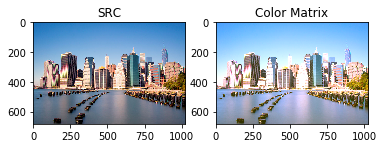

In [29]:
plt.subplot(121)
plt.imshow(src)
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst)
plt.title('Color Matrix')

## 2、颜色反向
-1,0,0,0,255

0,-1,0,0,255

0,0,-1,0,255

0,0,0,1,0

In [30]:
c_matrix = np.array([
    [-1,0,0,0,255],
    [0,-1,0,0,255],
    [0,0,-1,0,255],
    [0,0,0,1,0],
    [0,0,0,0,1]
],dtype=np.float32)
dst = color_matrix_filter(src,c_matrix)

Text(0.5,1,'Color Matrix')

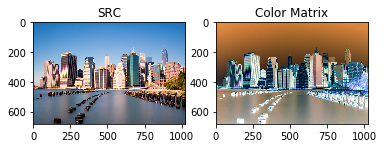

In [31]:
plt.subplot(121)
plt.imshow(src)
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst)
plt.title('Color Matrix')

## 3.灰度化

0.3086, 0.6094, 0.0820, 0, 0

0.3086, 0.6094, 0.0820, 0, 0

0.3086, 0.6094, 0.0820, 0, 0

0    , 0    , 0    , 1, 0
0，0，0，0，1

In [32]:
c_matrix = np.array([
    [0.3086, 0.6094, 0.0820, 0, 0],
    [0.3086, 0.6094, 0.0820, 0, 0],
    [0.3086, 0.6094, 0.0820, 0, 0],
    [0,0,0,1,0],
    [0,0,0,0,1]
],dtype=np.float32)
dst = color_matrix_filter(src,c_matrix)

Text(0.5,1,'Color Matrix')

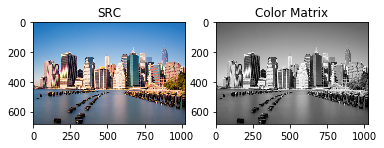

In [33]:
plt.subplot(121)
plt.imshow(src)
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst)
plt.title('Color Matrix')

## 4、色彩饱和度

N取值为0到2，当然也可以更高。

0.3086*(1-N) + N, 0.6094*(1-N)    , 0.0820*(1-N)    , 0, 0,

0.3086*(1-N)   , 0.6094*(1-N) + N, 0.0820*(1-N)    , 0, 0,

0.3086*(1-N)   , 0.6094*(1-N)    , 0.0820*(1-N) + N 0, 0,

0        , 0        , 0        , 1, 0

分析：
1、当色彩饱和度低到一定成度的时候，就想当于给图像去色，所以跟第3条：图像去色，有着千丝万缕的联系，在此不想过多解释；

2、N为原有通道信息保留量；可以理解为百分之几，等于0时完全去色，小于1时降低色度，大于1时增加色度，等于2时色度翻一倍，等于3时……。注意：RGB的原有通道信息保留量都应该相等，不然会产生偏色。

3、为什么是这样的计算公式：
N是原通道色彩保留量：所以，在原通道中，我们都+ N，这是不能被别的通道瓜分的。剩余的就是（1－N），就让RGB按0.3086, 0.6094, 0.0820的比例还瓜分这个剩余量吧。

## 5、对比度

N取值为0到10

N,0,0,0,128*(1-N)

0,N,0,0,128*(1-N)

0,0,N,0,128*(1-N)

0,0,0,1,0

分析：

所谓对比度就是让红的更红，绿的更绿……或反之。初一想，我们只需要修改RGB的乘数（要一至，不然偏色）。可仔细一琢磨，不对。如果只增加乘数，那么整个图像就会被漂白，（或反之）。好，有办法了，设置色彩偏移量，offset。具体要偏移多少呢，我们找到了一个折中的方案：128（1－N);即：一幅图像，不论很亮或很黑，但对比度为0了，最终得到的都是一幅中性灰度的图像（128），

## 6、阈值

所谓阈值，就是以一个色度值为基准对图像作非黑即白的处理（注意没有灰色），由于不去除了彩色属性，因此，也离不开0.3086, 0.6094, 0.0820这三组神奇的数字。

(N取值为0到255)

下面的256也可以改成255；（那样就能看到图一和图五的小黑点和小白点）；
0.3086*256,0.6094*256,0.0820*256,0,-256*N

0.3086*256,0.6094*256,0.0820*256,0,-256*N

0.3086*256,0.6094*256,0.0820*256,0,-256*N

0, 0, 0, 1, 0

分析：

先不看最后面的色彩偏移：-256*N

前面我们提及过，当RGB三个通道的色彩信息一模一样时，图像就失去了色彩（去色），从0.3086*256,0.6094*256,0.0820*256,0,-256*N可以看出：图像已经去色了，并且，（*256）亮度已经翻了256倍（当然也可以是255）；我们知道，RGB的有效值是0－255，即：0，1，2……255，把这些值乘以255以后会出现什么情况呢？但是除了0之外，别的全都大于或等于255了，所以此时的图像除了剩有几个黑点外，其它的全都变成白色了如图一（N＝0）；那么现在我们再作色彩偏移处理：把RGB都减去255；上次值为255（白色）的现在又变成0（黑色了）超过255的仍然是白色，我们不断的反复减255，图2，图3，图4，图5，分别是N＝64，N＝128，n=192,n=255时的图像：

## 7、色彩旋转

所谓色彩旋转就是让某一个通道的色彩信息让另一个通道去显示；比如，R显示G的信息，G显示B的信息，B显示R的信息，也可以只拿出一部份信息让给别的通道去显示，至于参数的瓜分可以平分。不必太讲究，但是，始终要坚持的一个原则就是每一个通道中的RGB信息量之和一定要为1，不然将会生偏色，如果您要制作偏色效果又另当别论；请偿试下面的参数：

0,1,0,0,0

0,0,1,0,0

1,0,0,0,0

0,0,0,1,0

//---------------

0,0,1,0,0

1,0,0,0,0

0,1,0,0,0

0,0,0,1,0


## 8、只显示某个通道；

1,0,0,0,0

参考：

[1]. https://blog.csdn.net/u010335298/article/details/51957126

[2]. https://www.cnblogs.com/tinytiny/p/3317372.html